# 🚀 Spaceship Titanic project (1) - Raquel G Vernet

Hi! 👋 This notebook is part of my personal data science portfolio.  

The goal of the whole project is to analyze the **Spaceship Titanic** dataset from Kaggle and build a (base) predictive model to determine whether passengers were transported to another dimension.  

In this notebook, I will focus on exploratory data analysis, imputation & feature engineering.

---

## Main Steps  

1. **Exploratory Data Analysis (EDA)**  
   - Explore the dataset, check distributions, correlations, and missing values.  
   
   
2. **Imputation of missing data**
   - Handle missing data (imputation strategies).  
   

3. **Feature Engineering & Data cleaning**    
   - Create new features that may improve predictive performance. 
   - Encode categorical variables and scale numerical features if needed.
   - Save preprocessed datasets
   

4. 📌 **Conclusions**  
   - Summarize key findings and lessons learned.  

## 1. Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd 
#import seaborn as sns
#import matplotlib.pyplot as plt
#import numpy as np


Train_Space = pd.read_csv('train.csv')
Test_Space = pd.read_csv('test.csv')

Train_Space.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [2]:
Test_Space.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Basic information for understanding our dataset:

👉 **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

👉 **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

👉 **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

👉 **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

👉 **Destination** - The planet the passenger will be debarking to.

👉 **Age** - The age of the passenger.

👉 **VIP** - Whether the passenger has paid for special VIP service during the voyage.

👉 **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

👉 **Name** - The first and last names of the passenger.

👉 **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

Let's explore whether we have missing values, and what kind of data do we have at each column:

In [3]:
summary = pd.DataFrame({
    "DataType": Train_Space.dtypes,
    "Count NA": Train_Space.isna().sum(),
    "% NA": (Train_Space.isna().sum() / len(Train_Space) * 100).round(2)
})
display(summary)

,DataType,Count NA,% NA
PassengerId,object,0,0.00
HomePlanet,object,201,2.31
CryoSleep,object,217,2.50
Cabin,object,199,2.29
Destination,object,182,2.09
Age,float64,179,2.06
VIP,object,203,2.34
RoomService,float64,181,2.08
FoodCourt,float64,183,2.11
ShoppingMall,float64,208,2.39


In [4]:
summary = pd.DataFrame({
    "DataType": Test_Space.dtypes,
    "Count NA": Test_Space.isna().sum(),
    "% NA": (Test_Space.isna().sum() / len(Test_Space) * 100).round(2)
})
display(summary)

,DataType,Count NA,% NA
PassengerId,object,0,0.00
HomePlanet,object,87,2.03
CryoSleep,object,93,2.17
Cabin,object,100,2.34
Destination,object,92,2.15
Age,float64,91,2.13
VIP,object,93,2.17
RoomService,float64,82,1.92
FoodCourt,float64,106,2.48
ShoppingMall,float64,98,2.29


The percentage of NAs is not very high and is fairly consistent across all columns (around 2%). This is consistent with the Test dataset. From now on, all checks will be performed only in the Train Dataset.

We can easily check for passengers with a lot of missing information—rows that we could potentially remove:

In [5]:
#Calculate number of NA per row
na_por_fila = Train_Space.isna().sum(axis=1)

#Filtering using pandas
filas_mas_de_2_na = Train_Space[na_por_fila > 2]
filas_mas_de_3_na = Train_Space[na_por_fila > 3]

#Print number of passengers with more than 2 NA & more than 3 NA
print(len(filas_mas_de_2_na))
print(len(filas_mas_de_3_na))

17
0


Great! We have sufficient information for all our passengers, so it is better not to remove any rows. Next, let’s explore whether the numerical features of our dataset show **correlations**. This analysis will be important for: 
1) Choosing the best imputation method

2) Deciding how to create engineered features.

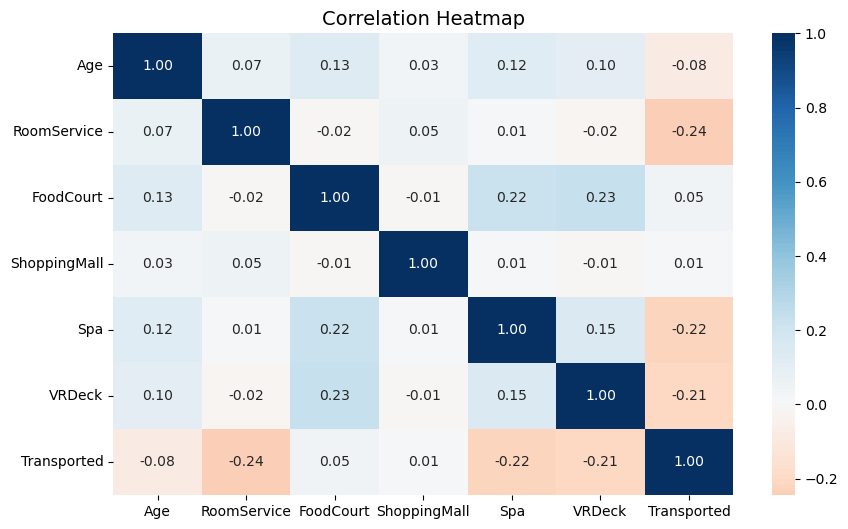

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(10,6))
tit_corr = Train_Space.corr()  
sns.heatmap(tit_corr, annot=True, cmap="RdBu", center=0, fmt=".2f") #formato
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

The previous plot shows Pearson correlations across numerical variables, including Boolean variables (True/False) such as Transported, which are effectively point-biserial correlations.

Key observations:

**a) Correlations are generally low**, so complex imputation methods like MICE may not be optimal. Exploring other data patterns before imputing with mode or median is recommended.

**b) Spending columns also show low correlations**, suggesting varied spending across amenities. Creating a global spending feature could help capture hidden patterns.

Next, we examine potential spending-related patterns, for example, whether people young people or in cryosleep spend any money:

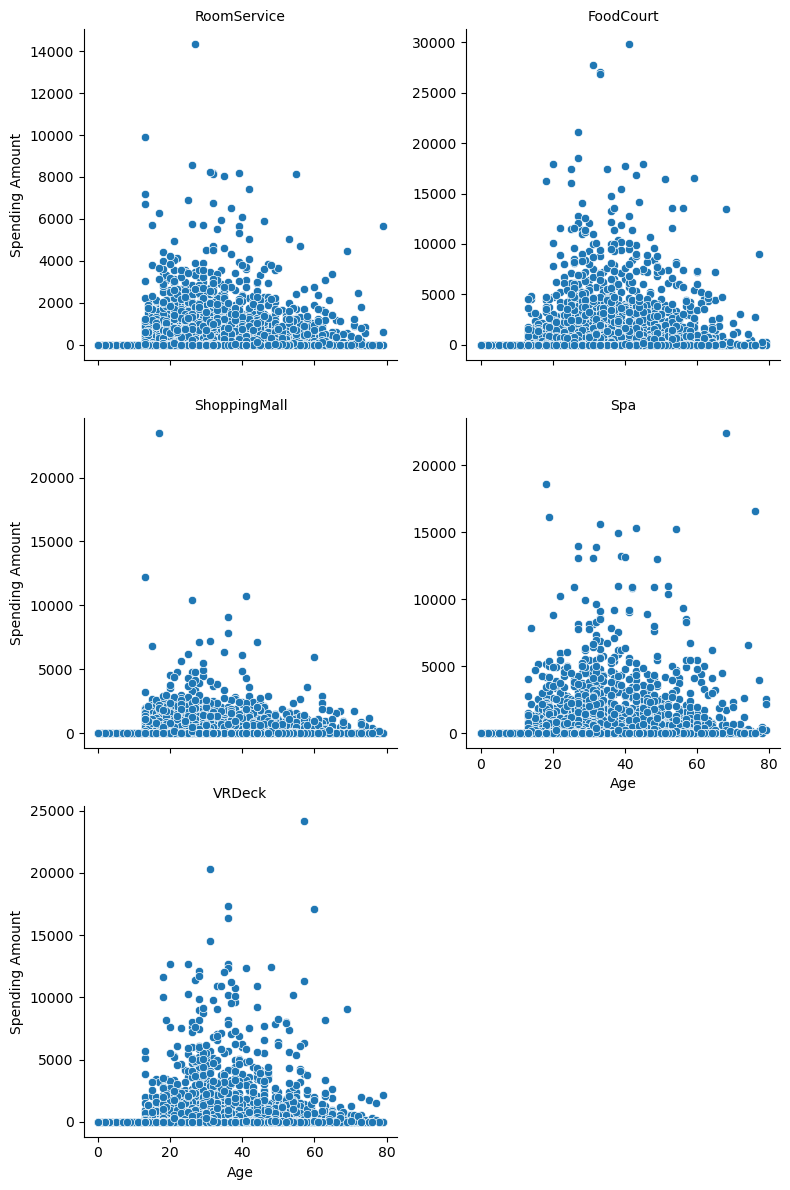

In [7]:
spending_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa","VRDeck"]

# Melt the DataFrame to long format
melted = Train_Space.melt(id_vars="Age", value_vars=spending_cols, var_name="SpendingType", value_name="Amount")

# Create FacetGrid
g = sns.FacetGrid(melted, col="SpendingType", col_wrap=2, height=4, sharey=False)
g.map_dataframe(sns.scatterplot, x="Age", y="Amount")
g.set_axis_labels("Age", "Spending Amount")
g.set_titles("{col_name}")
plt.show()

In [8]:
#CODE FOR CHECKING UP TO WHICH AGE THEY ARE NOT SPENDING MONEY

#from IPython.display import display

#age_spending = Train_Space[["Age"] + spending_cols].copy()
#age_spending[spending_cols] = age_spending[spending_cols].fillna(0)

#age_spending["TotalSpending"] = age_spending[spending_cols].sum(axis=1)

#zero_spending_counts = age_spending.groupby("Age")["TotalSpending"].apply(lambda x: (x != 0).sum())

#with pd.option_context("display.max_rows", None):
#    display(zero_spending_counts)

#print(zero_spending_counts.to_string())

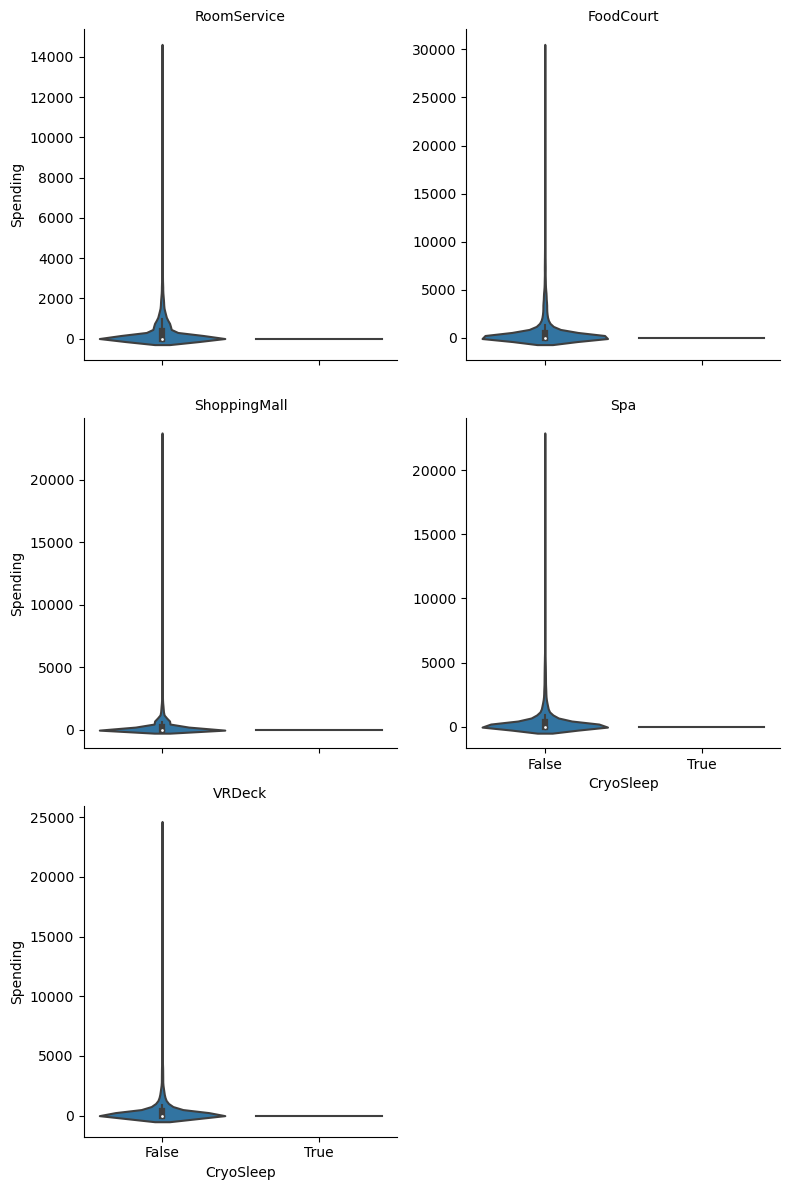

In [9]:
g = sns.FacetGrid(
    Train_Space.melt(id_vars="CryoSleep", value_vars=spending_cols),
    col="variable", col_wrap=2, height=4, sharey=False
)
g.map_dataframe(sns.violinplot, x="CryoSleep", y="value")
g.set_axis_labels("CryoSleep", "Spending")
g.set_titles("{col_name}")

In [10]:
# Passengers with CryoSleep == False but TotalSpending == 0
mask = (Train_Space["CryoSleep"] == False) & (Train_Space[spending_cols].sum(axis=1) == 0)
zero_spenders_awake = Train_Space.loc[mask]

print(f"Number of CryoSleep=False with zero spending: {zero_spenders_awake.shape[0]}")
display(zero_spenders_awake.head())

Number of CryoSleep=False with zero spending: 518


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True
24,0020_04,Earth,False,E/0/S,TRAPPIST-1e,10.0,False,0.0,0.0,0.0,0.0,0.0,Breney Jacostanley,True
26,0020_06,Earth,False,E/0/S,TRAPPIST-1e,7.0,False,0.0,0.0,0.0,0.0,0.0,Terta Mcfaddennon,False
34,0031_02,Mars,False,F/9/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Cinets Datie,True


In [11]:
# Summary stats on Age
age_stats = {
    "mean": zero_spenders_awake["Age"].mean(),
    "median": zero_spenders_awake["Age"].median(),
    "25th_percentile": zero_spenders_awake["Age"].quantile(0.25),
    "75th_percentile": zero_spenders_awake["Age"].quantile(0.75),
    "min": zero_spenders_awake["Age"].min(),
    "max": zero_spenders_awake["Age"].max()
}

print("\nAge statistics for CryoSleep=False with zero spending:")
for k, v in age_stats.items():
    print(f"{k}: {v:.2f}")


Age statistics for CryoSleep=False with zero spending:
mean: 10.46
median: 7.00
25th_percentile: 2.00
75th_percentile: 12.00
min: 0.00
max: 71.00


As expected, passengers in cryosleep or under 13 years old did not spend any money — an important consideration for imputation. However, spending equal to zero does not necessarily indicate that a passenger is in cryosleep; in most cases, it simply means the passenger is under 13, as we observed earlier.

Next, let’s explore how spending habits relate to HomePlanet or VIP status:

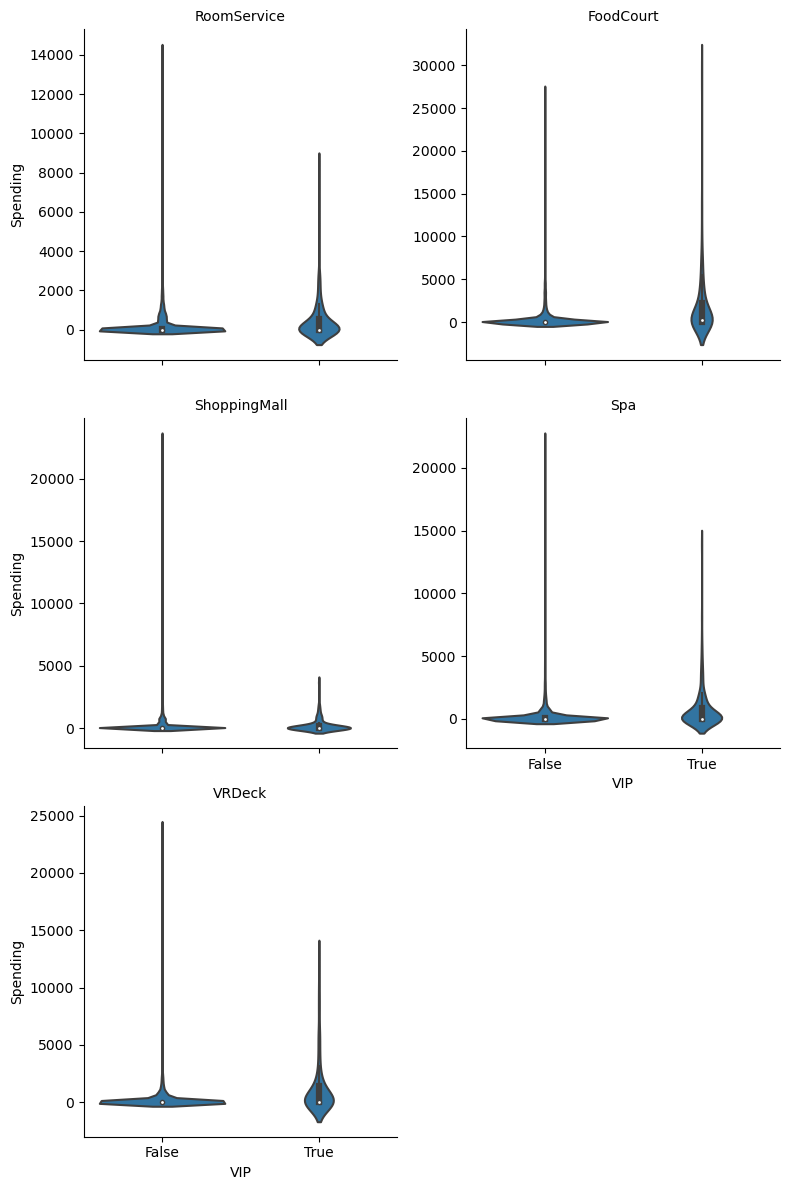

In [12]:
g = sns.FacetGrid(
    Train_Space.melt(id_vars="VIP", value_vars=spending_cols),
    col="variable", col_wrap=2, height=4, sharey=False
)
g.map_dataframe(sns.violinplot, x="VIP", y="value")
g.set_axis_labels("VIP", "Spending")
g.set_titles("{col_name}")

In [13]:
vip_counts = Train_Space["VIP"].value_counts(dropna=False)
print(vip_counts)

False    8291
NaN       203
True      199
Name: VIP, dtype: int64


Interestingly, VIP status seems to not be related with the spending habits. In addition, VIP = TRUE is not frequent

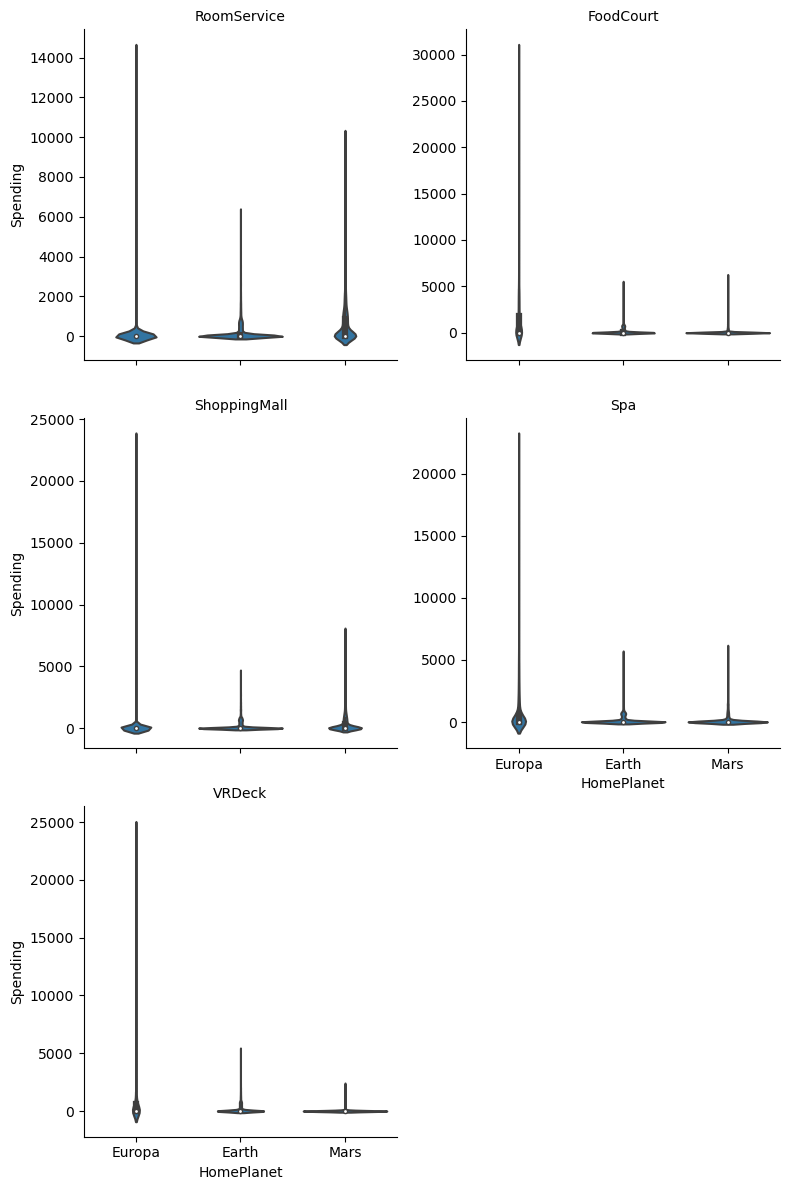

In [14]:
g = sns.FacetGrid(
    Train_Space.melt(id_vars="HomePlanet", value_vars=spending_cols),
    col="variable", col_wrap=2, height=4, sharey=False
)
g.map_dataframe(sns.violinplot, x="HomePlanet", y="value")
g.set_axis_labels("HomePlanet", "Spending")
g.set_titles("{col_name}")

Overall, passengers from Europa tend to spend more compared to those from other planets.
Next, let’s examine how CryoSleep status might be related to a passenger’s home planet.

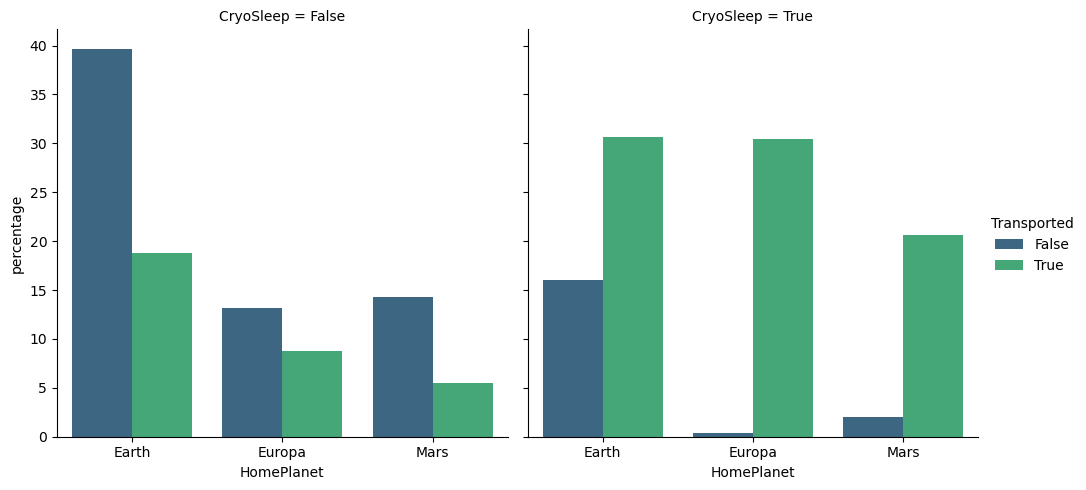

In [15]:
# Group data by CryoSleep, HomePlanet, and Transported
grouped = Train_Space.groupby(['CryoSleep', 'HomePlanet', 'Transported']).size().reset_index(name='count')

# Calculate percentages within each CryoSleep group
grouped['percentage'] = grouped.groupby('CryoSleep')['count'].apply(lambda x: x / x.sum() * 100)

# Plot
sns.catplot(
    x='HomePlanet',
    hue='Transported',
    col='CryoSleep',
    kind='bar',  # use 'bar' for aggregated values
    data=grouped,
    y='percentage',
    palette='viridis'
)
plt.ylabel('Percentage')
plt.show()

#print(grouped)


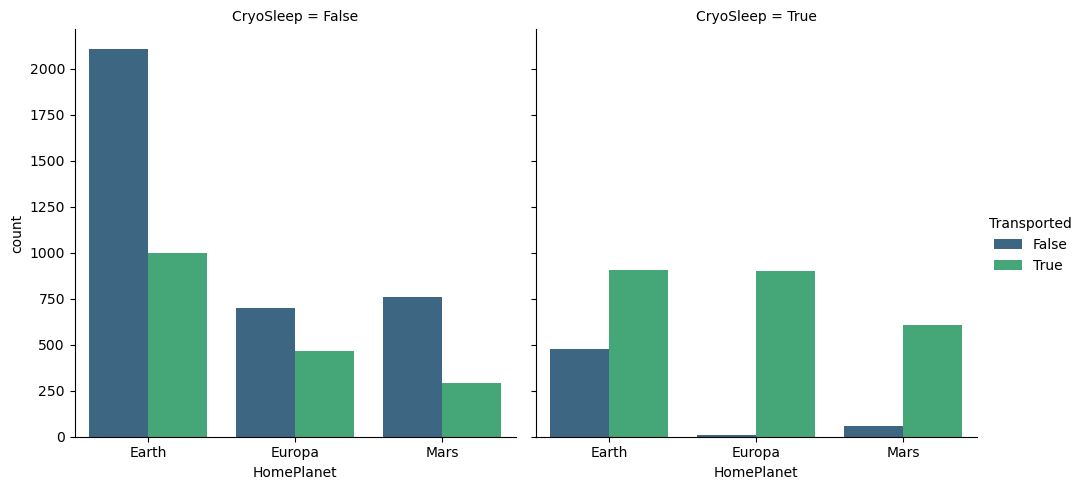

In [16]:
# Plot
sns.catplot(
    x='HomePlanet',
    hue='Transported',
    col='CryoSleep',
    kind='bar',  # use 'bar' for aggregated values
    data=grouped,
    y='count',
    palette='viridis'
)

plt.show()

In the first plot, we see the percentage of each CryoSleep state (True or False), by home planet and transported status. The percentage of transported passengers is higher when CryoSleep is set to True, especially for those from Europa and Mars. Additionally, Earth consistently appears as the most common home planet (second plot).

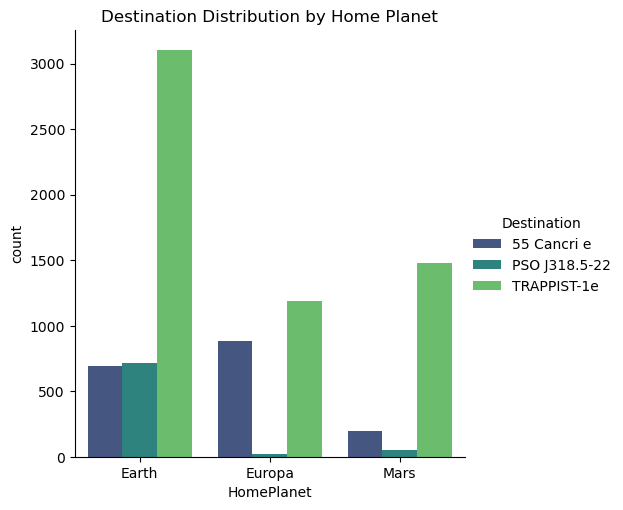

In [17]:
counts = Train_Space.groupby(['HomePlanet', 'Destination']).size().reset_index(name='count')

sns.catplot(
    data=counts,
    x='HomePlanet',
    y='count',
    hue='Destination',
    kind='bar',
    palette='viridis'
)
plt.title("Destination Distribution by Home Planet")
plt.show()


In [18]:
counts['percentage'] = counts.groupby('HomePlanet')['count'].apply(lambda x: x / x.sum() * 100)
display(counts)

,HomePlanet,Destination,count,percentage
0,Earth,55 Cancri e,690,15.323118
1,Earth,PSO J318.5-22,712,15.811681
2,Earth,TRAPPIST-1e,3101,68.865201
3,Europa,55 Cancri e,886,42.311366
4,Europa,PSO J318.5-22,19,0.907354
5,Europa,TRAPPIST-1e,1189,56.781280
6,Mars,55 Cancri e,193,11.240536
7,Mars,PSO J318.5-22,49,2.853815
8,Mars,TRAPPIST-1e,1475,85.905649


The most frequent destination is consistently TRAPPIST. Interestingly, PSO is almost exclusively chosen by passengers from Earth (15% compared to 0.9% and 2% for other planets). Additionally, Cancri is a more common destination for passengers from Europa.

Since some passengers travel in groups, let’s examine whether destination and/or origin are shared among group members. We will **create a new column called GroupID**

In [19]:
# Extract GroupID from column PassengerId
Train_Space["GroupID"] = Train_Space["PassengerId"].str.split("_").str[0]

# Count how many unique destinations each group has
group_dest = (
    Train_Space.groupby("GroupID")["Destination"]
    .nunique()
    .reset_index(name="UniqueDestinations")
)

#Check
print(group_dest["UniqueDestinations"].value_counts())

1    5397
2     668
0     103
3      49
Name: UniqueDestinations, dtype: int64


In [20]:
# Count how many unique destinations each group has
group_home = (
    Train_Space.groupby("GroupID")["HomePlanet"]
    .nunique()
    .reset_index(name="UniqueHome")
)

#Check
print(group_home["UniqueHome"].value_counts())

1    6107
0     110
Name: UniqueHome, dtype: int64


Passengers do not always share the same destination; however, they always share the same HomePlanet.

Finally, we will explore age distributions by HomePlanet, Cryosleep status and Transported status:

Text(0.5, 1.0, 'All Passengers')

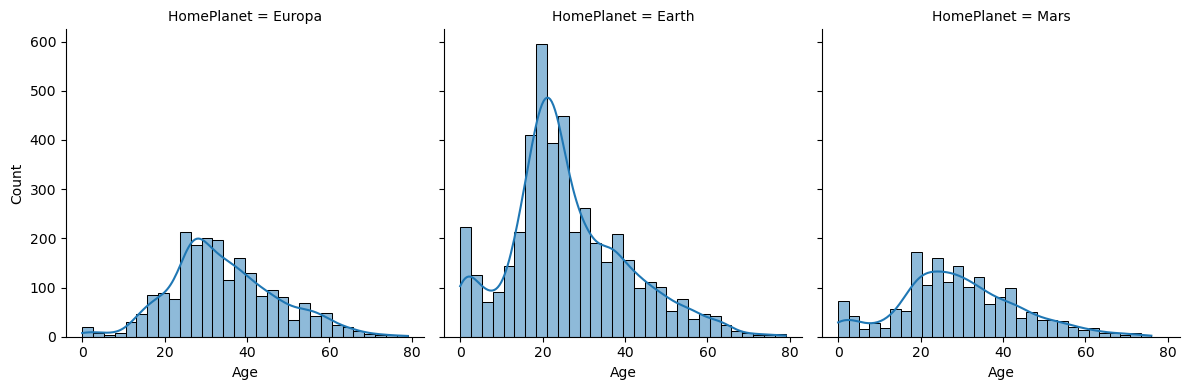

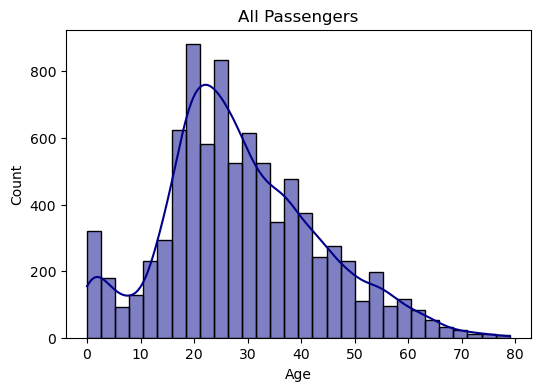

In [21]:
g = sns.FacetGrid(Train_Space, col="HomePlanet", col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.histplot, "Age", bins=30, kde=True)

#Plotting:
plt.figure(figsize=(6,4))
sns.histplot(Train_Space["Age"], kde=True, bins=30, color="darkblue")
plt.title("All Passengers")

Text(0.5, 1.0, 'All Passengers')

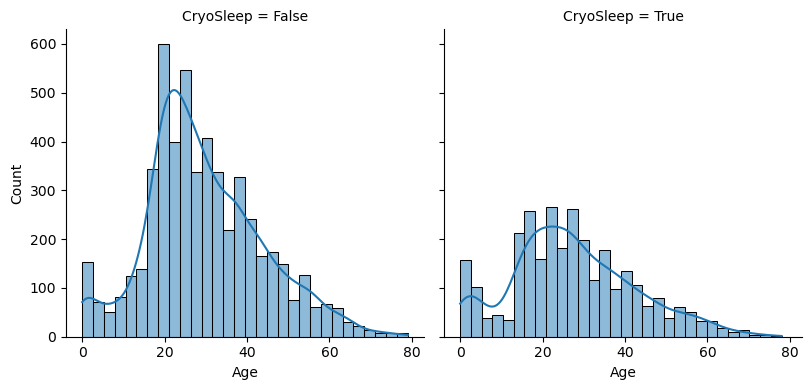

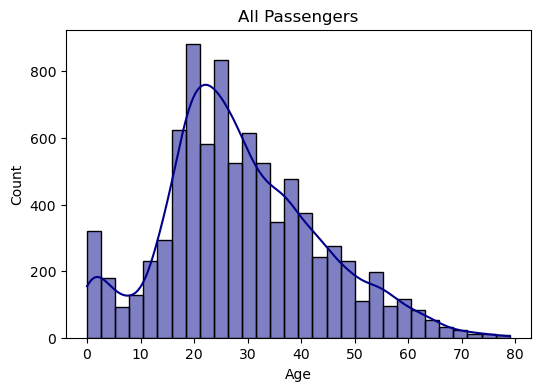

In [22]:
g = sns.FacetGrid(Train_Space, col="CryoSleep", col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.histplot, "Age", bins=30, kde=True)

#Plotting:
plt.figure(figsize=(6,4))
sns.histplot(Train_Space["Age"], kde=True, bins=30, color="darkblue")
plt.title("All Passengers")

Text(0.5, 1.0, 'All Passengers')

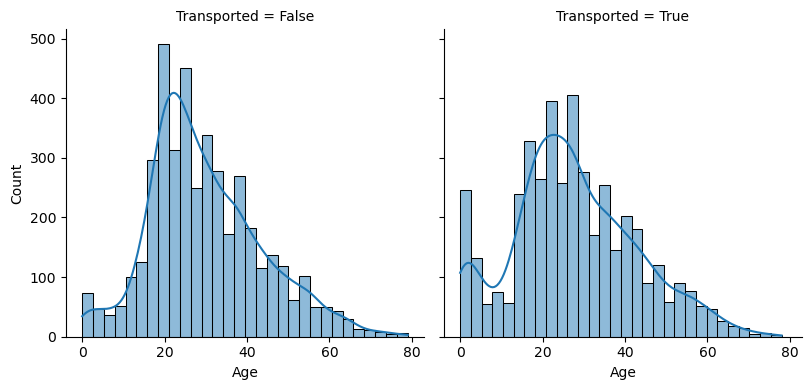

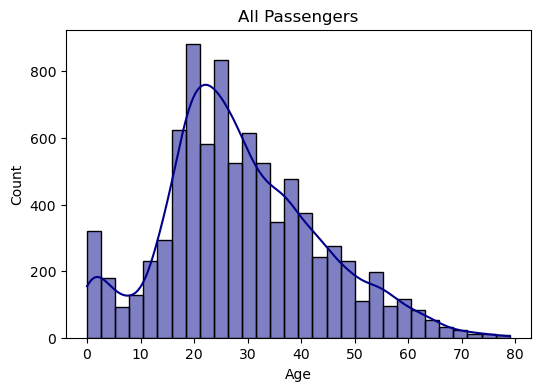

In [23]:
g = sns.FacetGrid(Train_Space, col="Transported", col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.histplot, "Age", bins=30, kde=True)

#Plotting:
plt.figure(figsize=(6,4))
sns.histplot(Train_Space["Age"], kde=True, bins=30, color="darkblue")
plt.title("All Passengers")

Age distributions are broadly similar across CryoSleep status and HomePlanet, although the youngest passengers (<20) are more common when coming from Earth. Interestingly, younger passengers are also highly represented among those who were transported.

### EXPLORATORY DATA ANALYSIS CONCLUSIONS:

This section summarizes the main insights from the exploratory analysis and highlights decisions that will guide the next preprocessing steps.

**1. Missing data**
- Missing values (NAs) are evenly distributed across variables, and the overall percentage is low (around 2% for each variable).
- NAs are spread across passenger records. At most, a single passenger record contains 3 missing values, which is uncommon.

**2. General patterns**
- Correlations among numeric variables are generally low, including across all spending columns.
- Passengers under 13 years old do not spend any money.
- Passengers in CryoSleep do not spend any money.
- Passengers from Europa tend to spend more than passengers from other planets.
- Earth is the most common home planet, and most Earth passengers travel to TRAPPIST.
- Europa passengers mainly travel to CANCRI or TRAPPIST, while Mars passengers primarily go to TRAPPIST. Neither Europa nor Mars passengers travel to PSO.
- Passengers from the same group always share the same home planet, but not necessarily the same destination.
- Age distributions are similar across planets, although Earth has a higher proportion of younger passengers.

**3. Imputation methods**

Due to the low correlation among features, automatic imputation methods that rely on feature correlations (e.g., MICE) may perform poorly. Therefore, I will apply **domain-driven imputation rules** using the information that we gathered during EDA. See more details below.

**4. Creation of new columns**
- **GroupTravel (boolean):** Indicates whether a passenger travels in a group, based on Group_ID.
- **FamilyTravel (boolean):** Indicates whether a passenger travels with family, derived from GroupTravel and surname information.
- **Total Spending (float)** -> sum of all the spending columns
- **Deck (object)** -> From Cabin [0]  
- **Num (object)** -> From Cabin [1]
- **Side (object)** -> From Cabin [2]

Note: Age can be binned into categories if desired, but this is not crucial when using Random Forest models.

## 2. IMPUTATION OF MISSING DATA

We will use **domain-driven imputation rules**. 

**❗ Important!** Missing data imputation must be applied independently on the training and test datasets to avoid data leakage. Since the final objective is to predict on the official TEST dataset, imputing using the full TRAIN dataset is valid and correct.

However, for model tuning and validation, we also split the training dataset into a temporary train/validation split. To keep this tutorial concise, the imputation was performed once on the entire training dataset, rather than redoing it separately for each split. Given that the dataset is relatively large and the percentage of missing values is low, this simplification should not significantly affect model performance.

When building the final model, the TEST dataset will be independently imputed using the same domain-driven rules, ensuring no leakage.

Lets remember our dataset:

In [24]:
Train_Space.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004


### IMPUTATION METHODS THAT I WILL USE FOR EACH COLUMN

👉 **HomePlanet:** First, check if the passenger is traveling in a group. If yes, impute with the same HomePlanet as the group. If not, use a probabilistic assignment based on the Destination. If Destination information is missing, impute with the median.

👉 **CryoSleep:** For passengers older than 13, if the sum of spending columns is 0, impute TRUE; otherwise, impute FALSE (deterministic approach). For passengers younger than 13 or with missing values, impute using a probabilistic assignment calculated for all passengers under 13.
 
👉 **Cabin:** NA = Unknown

👉 **Destination:** Impute using a probabilistic assignment based on HomePlanet.

👉 **Age:** If the sum of spending columns is 0 and CryoSleep is FALSE, impute with 6 (half of 13). Otherwise, impute using the median based on HomePlanet.

👉 **VIP:** Impute using the mode (False, which is much more frequent than True).

👉 **Spending categories:** If Age < 13 and/or CryoSleep = True, impute with 0. Otherwise, impute using the median based on HomePlanet.

👉 **Name:** NA = Unknown

Lets prepare our datasets for the imputation:

In [25]:
#First, I will create a copy of the original dataset -> this will allow me to track and go back 
Train_Space_Impute = Train_Space.copy()
Test_Space_Impute = Test_Space.copy()

In [26]:
#In addition, lets create a dataset containing only the imputing information - whether a value was / was not imputed
imputed_values = Train_Space.copy()
columns_to_flag = ["Age", "HomePlanet", "CryoSleep", "Cabin", "Destination",
                   "VIP", "RoomService", "FoodCourt", "ShoppingMall", "VRDeck", "Name"]

for col in columns_to_flag:
    imputed_values[f"{col}_imputed"] = imputed_values[col].isna()

#keep only the "_imputed" columns
imputed_values = imputed_values[[c for c in imputed_values.columns if c.endswith("_imputed")]]

#imputed_values.head()

In [27]:
#In addition, lets create a dataset containing only the imputing information - whether a value was / was not imputed
imputed_values_test = Test_Space.copy()
columns_to_flag = ["Age", "HomePlanet", "CryoSleep", "Cabin", "Destination",
                   "VIP", "RoomService", "FoodCourt", "ShoppingMall", "VRDeck", "Name"]

for col in columns_to_flag:
    imputed_values_test[f"{col}_imputed"] = imputed_values_test[col].isna()

#keep only the "_imputed" columns
imputed_values_test = imputed_values_test[[c for c in imputed_values_test.columns if c.endswith("_imputed")]]

#imputed_values.head()

In [28]:
print(len(Train_Space_Impute))
print(len(Test_Space_Impute))

8693
4277


### 2.A. HomePlanet Imputation

In [29]:
import numpy as np

def impute_homeplanet(df, random_state=None):
    
    if random_state is not None:
        np.random.seed(random_state)
    
    # Step 1: Ensure GroupID exists
    if "GroupID" not in df.columns:
        df["GroupID"] = df["PassengerId"].str.split("_").str[0]
    
    # Count missing before
    missing_before = df["HomePlanet"].isna().sum()
    print(f"Missing HomePlanet before imputation: {missing_before}")
    
    # Create GroupID → most frequent HomePlanet mapping
    group_planet = df.groupby("GroupID")["HomePlanet"].agg(
        lambda x: x.mode().iloc[0] if not x.mode().empty else None
    )
    print("\nGroup → HomePlanet mapping (head):")
    print(group_planet.head())
    
    # Mask missing HomePlanet
    mask_missing = df["HomePlanet"].isna()
    
    # Impute based on group
    df.loc[mask_missing, "HomePlanet"] = df.loc[mask_missing, "GroupID"].map(group_planet)
    
    # Count missing after group-based imputation
    missing_after_group = df["HomePlanet"].isna().sum()
    num_imputed_group = missing_before - missing_after_group
    print(f"\nNumber imputed using group info: {num_imputed_group}")
    print(f"Remaining missing after group step: {missing_after_group}")
    
    # Step 2: Probabilistic assignment based on Destination
    destination_dist = df.groupby("Destination")["HomePlanet"].value_counts(normalize=True).unstack(fill_value=0)
    print("\nDistribution of HomePlanet by Destination:")
    print(destination_dist)
    
    def assign_homeplanet_prob(row):
        if pd.notna(row["HomePlanet"]):
            return row["HomePlanet"]  # already filled
        dest = row["Destination"]
        if pd.isna(dest) or dest not in destination_dist.index:
            return df["HomePlanet"].mode()[0]  # fallback to mode
        probs = destination_dist.loc[dest]
        return np.random.choice(probs.index, p=probs.values)
    
    df["HomePlanet"] = df.apply(assign_homeplanet_prob, axis=1)
    
    # Count missing after probabilistic assignment
    missing_final = df["HomePlanet"].isna().sum()
    print(f"\nFinal remaining missing after probabilistic assignment: {missing_final}")
    
    return df

In [30]:
Train_Space_Impute=impute_homeplanet(Train_Space_Impute, random_state=42) #Train imputation

Missing HomePlanet before imputation: 201

Group → HomePlanet mapping (head):
GroupID
0001    Europa
0002     Earth
0003    Europa
0004     Earth
0005     Earth
Name: HomePlanet, dtype: object

Number imputed using group info: 90
Remaining missing after group step: 111

Distribution of HomePlanet by Destination:
HomePlanet        Earth    Europa      Mars
Destination                                
55 Cancri e    0.388671  0.502524  0.108805
PSO J318.5-22  0.912102  0.024204  0.063694
TRAPPIST-1e    0.535561  0.207198  0.257241

Final remaining missing after probabilistic assignment: 0


In [31]:
Test_Space_Impute=impute_homeplanet(Test_Space_Impute, random_state=42) #Test imputation

Missing HomePlanet before imputation: 87

Group → HomePlanet mapping (head):
GroupID
0013     Earth
0018     Earth
0019    Europa
0021    Europa
0023     Earth
Name: HomePlanet, dtype: object

Number imputed using group info: 41
Remaining missing after group step: 46

Distribution of HomePlanet by Destination:
HomePlanet        Earth    Europa      Mars
Destination                                
55 Cancri e    0.358604  0.518652  0.122744
PSO J318.5-22  0.927273  0.025974  0.046753
TRAPPIST-1e    0.540198  0.188847  0.270954

Final remaining missing after probabilistic assignment: 0


### 2.B. CryoSleep Imputation

*NOTE: In this step, I will create the "Total Spending" column that is not the FINAL ONE*

In [32]:
def impute_cryosleep(df, spending_cols, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
        
    # Step 1: calculate TotalSpending
    df["TotalSpending"] = df[spending_cols].sum(axis=1)

    # Count missing before
    missing_before = df["CryoSleep"].isna().sum()
    print(f"Missing CryoSleep before imputation: {missing_before}")

    mask_missing = df["CryoSleep"].isna()

    # Step 2: Deterministic imputation for passengers with spending > 0
    df.loc[mask_missing & (df["TotalSpending"] > 0), "CryoSleep"] = False

    # Count after deterministic step
    missing_after_det = df["CryoSleep"].isna().sum()
    num_imputed_det = missing_before - missing_after_det
    print(f"Number imputed deterministically (spending > 0 → False): {num_imputed_det}")
    print(f"Remaining missing after deterministic step: {missing_after_det}")

    # Step 3: Probabilistic imputation for passengers with spending == 0
    prob_cryosleep_zero = df.loc[df["TotalSpending"] == 0, "CryoSleep"].value_counts(normalize=True)
    print("\nCryoSleep distribution for TotalSpending == 0:")
    print(prob_cryosleep_zero)

    def assign_cryosleep_prob(row):
        if pd.notna(row["CryoSleep"]):
            return row["CryoSleep"]
        # Spending == 0 → assign probabilistically
        return np.random.choice(prob_cryosleep_zero.index, p=prob_cryosleep_zero.values)

    df["CryoSleep"] = df.apply(assign_cryosleep_prob, axis=1)

    # Final missing count
    missing_final = df["CryoSleep"].isna().sum()
    print(f"\nFinal remaining missing after probabilistic step: {missing_final}")

    return df

In [33]:
Train_Space_Impute=impute_cryosleep(Train_Space_Impute, spending_cols, random_state=42) #Train imputation

Missing CryoSleep before imputation: 217
Number imputed deterministically (spending > 0 → False): 119
Remaining missing after deterministic step: 98

CryoSleep distribution for TotalSpending == 0:
True     0.85429
False    0.14571
Name: CryoSleep, dtype: float64

Final remaining missing after probabilistic step: 0


In [34]:
Test_Space_Impute=impute_cryosleep(Test_Space_Impute, spending_cols, random_state=42) #Test imputation

Missing CryoSleep before imputation: 93
Number imputed deterministically (spending > 0 → False): 55
Remaining missing after deterministic step: 38

CryoSleep distribution for TotalSpending == 0:
True     0.874292
False    0.125708
Name: CryoSleep, dtype: float64

Final remaining missing after probabilistic step: 0


This is good! A lot of our missing values were imputed through the deterministic approach, which is highly reliable

### 2.C. Cabin  Imputation

In [35]:
# Count missing after all the imputation
print(Train_Space_Impute["Cabin"].isna().sum())
print(Test_Space_Impute["Cabin"].isna().sum())

199
100


In [36]:
# Impute missing Cabin values
Train_Space_Impute["Cabin"].fillna("Unknown", inplace=True)
Test_Space_Impute["Cabin"].fillna("Unknown", inplace=True)

In [37]:
# Count missing after all the imputation - should be 0 
print(Train_Space_Impute["Cabin"].isna().sum())
print(Test_Space_Impute["Cabin"].isna().sum())

0
0


### 2.D. Destination  Imputation

In [38]:
def impute_destination(df, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    # Count missing before
    missing_before = df["Destination"].isna().sum()
    print(f"Missing Destination before imputation: {missing_before}")

    # Calculate Destination probabilities per HomePlanet
    dest_dist = (
        df.groupby("HomePlanet")["Destination"]
        .value_counts(normalize=True)
        .unstack(fill_value=0)
    )
    print("\nDestination distribution by HomePlanet:")
    print(dest_dist.head())

    def assign_destination_prob(row):
        if pd.notna(row["Destination"]):
            return row["Destination"]  # already filled
        planet = row["HomePlanet"]
        if planet not in dest_dist.index or dest_dist.loc[planet].sum() == 0:
            #return mode (most freq Dest)
            return df["Destination"].mode()[0]
        # probabilistic method
        probs = dest_dist.loc[planet]
        return np.random.choice(probs.index, p=probs.values)

    # Impute
    df["Destination"] = df.apply(assign_destination_prob, axis=1)

    # Count missing after
    missing_after = df["Destination"].isna().sum()
    num_imputed = missing_before - missing_after
    print(f"\nNumber of Destination values imputed: {num_imputed}")
    print(f"Remaining missing after imputation: {missing_after}")

    return df

In [39]:
Train_Space_Impute=impute_destination(Train_Space_Impute, random_state=42)

Missing Destination before imputation: 182

Destination distribution by HomePlanet:
Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
HomePlanet                                          
Earth           0.153043       0.157609     0.689348
Europa          0.420513       0.008858     0.570629
Mars            0.109853       0.029445     0.860702

Number of Destination values imputed: 182
Remaining missing after imputation: 0


In [40]:
Test_Space_Impute=impute_destination(Test_Space_Impute, random_state=42)

Missing Destination before imputation: 92

Destination distribution by HomePlanet:
Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
HomePlanet                                          
Earth           0.133068       0.159151     0.707781
Europa          0.434696       0.009970     0.555334
Mars            0.113043       0.019565     0.867391

Number of Destination values imputed: 92
Remaining missing after imputation: 0


### 2.E. Age  Imputation

In [41]:
def impute_age(df, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    #1: Probabilistic assignment for likely children
    mask_children = df["Age"].isna() & (df["TotalSpending"] == 0) & (df["CryoSleep"] == False)
    num_children = mask_children.sum()
    
    # Use observed distribution of ages <= 12
    child_ages = df.loc[(df["Age"] <= 12), "Age"].dropna()
    df.loc[mask_children, "Age"] = np.random.choice(child_ages, size=num_children, replace=True)
    print(f"Assigned probabilistic ages for {num_children} likely children")
    
    #2: Probabilistic assignment for remaining missing ages (adults¿)
    mask_remaining = df["Age"].isna()
    remaining_count = mask_remaining.sum()
    
    for planet in df.loc[mask_remaining, "HomePlanet"].unique():
        planet_mask = mask_remaining & (df["HomePlanet"] == planet)
        # Use distribution of known ages > 13 on this planet
        adult_ages = df.loc[(df["HomePlanet"] == planet) & (df["Age"] > 13), "Age"].dropna()
        if len(adult_ages) == 0:
            # fallback: use all ages >13 in the dataset
            adult_ages = df.loc[df["Age"] > 13, "Age"].dropna()
        df.loc[planet_mask, "Age"] = np.random.choice(adult_ages, size=planet_mask.sum(), replace=True)
    
    print(f"Imputed probabilistic ages for {remaining_count} remaining missing passengers")
    
    return df

In [42]:
Train_Space_Impute=impute_age(Train_Space_Impute, random_state=42)

Assigned probabilistic ages for 7 likely children
Imputed probabilistic ages for 172 remaining missing passengers


In [43]:
Test_Space_Impute=impute_age(Test_Space_Impute, random_state=42)

Assigned probabilistic ages for 7 likely children
Imputed probabilistic ages for 84 remaining missing passengers


Most values were not imputed in the first step (likely children)

### 2.F. VIP  Imputation

In [44]:
# Count missing after all the imputation
print(Train_Space_Impute["VIP"].isna().sum())
print(Test_Space_Impute["VIP"].isna().sum())

203
93


In [45]:
# Impute missing VIP with mode
vip_mode = Train_Space_Impute["VIP"].mode()[0]  # should be False
Train_Space_Impute["VIP"].fillna(vip_mode, inplace=True)

vip_mode = Test_Space_Impute["VIP"].mode()[0]  # should be False
Test_Space_Impute["VIP"].fillna(vip_mode, inplace=True)

In [46]:
# Count missing after all the imputation - should be 0
print(Train_Space_Impute["VIP"].isna().sum())
print(Test_Space_Impute["VIP"].isna().sum())

0
0


### 2.G. Spending categories Imputation

*Note: Here, I will first remove the old "Total Spending" column - I will recalculate it once I finish the Imputation*

In [47]:
Train_Space_Impute.drop(columns=["TotalSpending"], inplace=True)
Test_Space_Impute.drop(columns=["TotalSpending"], inplace=True)

In [48]:
def impute_spending(df, spending_cols):
    for col in spending_cols:
        mask_children_or_cryosleep = (df["Age"] < 13) | (df["CryoSleep"] == True)
        mask_missing = df[col].isna()
        
        # Step 1: deterministic zeros
        df.loc[mask_children_or_cryosleep & mask_missing, col] = 0
        num_step1 = (mask_children_or_cryosleep & mask_missing).sum()
        
        # Step 2: median by HomePlanet for remaining
        mask_remaining = mask_missing & ~mask_children_or_cryosleep
        median_by_planet = df.groupby("HomePlanet")[col].transform("median")
        df.loc[mask_remaining, col] = median_by_planet[mask_remaining]
        num_step2 = mask_remaining.sum()
        
        print(f"{col}: imputed {num_step1} zeros, {num_step2} median values")
    
    return df

In [49]:
Train_Space_Impute=impute_spending(Train_Space_Impute, spending_cols)

RoomService: imputed 74 zeros, 107 median values
FoodCourt: imputed 77 zeros, 106 median values
ShoppingMall: imputed 107 zeros, 101 median values
Spa: imputed 70 zeros, 113 median values
VRDeck: imputed 82 zeros, 106 median values


In [50]:
Test_Space_Impute=impute_spending(Test_Space_Impute, spending_cols)

RoomService: imputed 27 zeros, 55 median values
FoodCourt: imputed 41 zeros, 65 median values
ShoppingMall: imputed 38 zeros, 60 median values
Spa: imputed 50 zeros, 51 median values
VRDeck: imputed 37 zeros, 43 median values


Between 1/3 and 1/2 of the imputations were performed based on the deterministic approach - this is, if the passenger is on cryosleep or is less than 13 years old, speding columns will be 0. For other cases, we used median values.

### 2.H. Name Imputation


In [51]:
# Count missing after all the imputation
print(Train_Space_Impute["Name"].isna().sum())
print(Test_Space_Impute["Name"].isna().sum())

200
94


In [52]:
# Impute missing Name values
Train_Space_Impute["Name"].fillna("Unknown", inplace=True)
Test_Space_Impute["Name"].fillna("Unknown", inplace=True)

In [53]:
# Count missing after all the imputation - should be 0
print(Train_Space_Impute["Name"].isna().sum())
print(Test_Space_Impute["Name"].isna().sum())

0
0


**Final check!**

In [54]:
Train_Space_Impute.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
GroupID         0
dtype: int64

In [55]:
Test_Space_Impute.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
GroupID         0
dtype: int64

## 3. Feature Engineering, Data Cleaning & Encoding categorical variables

In this section, I will create new columns that may be useful for prediction. I will also prepare the dataset for the modeling step

👉 **GroupTravel (boolean):** Indicates whether a passenger travels in a group, based on Group_ID.

In [56]:
# Create GroupTravel.
Train_Space_Impute["GroupTravel"] = Train_Space_Impute.groupby("GroupID")["PassengerId"].transform("count") > 1

# Type boolean:
Train_Space_Impute["GroupTravel"] = Train_Space_Impute["GroupTravel"].astype(bool)

In [57]:
# Create GroupTravel.
Test_Space_Impute["GroupTravel"] = Test_Space_Impute.groupby("GroupID")["PassengerId"].transform("count") > 1

# Type boolean:
Test_Space_Impute["GroupTravel"] = Test_Space_Impute["GroupTravel"].astype(bool)

👉 **FamilyTravel (boolean):** Indicates whether a passenger travels with family, derived from GroupTravel and surname information.

In [58]:
def add_family_travel(df, group_col="GroupTravel", id_col="GroupID", name_col="Name"):
    df = df.copy()
    
    # Extract surname
    df["Surname"] = df[name_col].str.split().str[-1]
    
    # Initialize FamilyTravel as False
    df["FamilyTravel"] = False
    
    # Consider only passengers who traveled in groups
    grouped = df[df[group_col]]
    
    # Iterate over each GroupID
    for group_id, group_df in grouped.groupby(id_col):
        surname_counts = group_df["Surname"].value_counts()
        family_surnames = surname_counts[surname_counts > 1].index
        mask = (df[id_col] == group_id) & (df["Surname"].isin(family_surnames))
        df.loc[mask, "FamilyTravel"] = True
    
    # Drop temporary surname column
    df.drop(columns=["Surname"], inplace=True)
    
    # Optional: print how many families were detected
    print(f"FamilyTravel feature added. {df['FamilyTravel'].sum()} passengers flagged as traveling with family.")
    
    return df

In [59]:
Train_Space_Impute=add_family_travel(Train_Space_Impute)

FamilyTravel feature added. 3453 passengers flagged as traveling with family.


In [60]:
Test_Space_Impute=add_family_travel(Test_Space_Impute)

FamilyTravel feature added. 1724 passengers flagged as traveling with family.


👉 **Total Spending (float)** -> sum of all the spending columns

In [61]:
# Sum the spending columns row-wise
Train_Space_Impute["TotalSpending"] = Train_Space_Impute[spending_cols].sum(axis=1)

In [62]:
# Sum the spending columns row-wise
Test_Space_Impute["TotalSpending"] = Test_Space_Impute[spending_cols].sum(axis=1)

👉 **Deck (object)** -> From Cabin [0]

👉 **Num (numeric)** -> From Cabin [1]

👉 **Side (object)** -> From Cabin [2]

In [63]:
def split_cabin(df, cabin_col="Cabin"):
    df = df.copy()
    
    # Split Cabin into parts
    cabin_split = df[cabin_col].str.split("/", expand=True)
    
    # Assign new categorical columns
    df["Deck"] = cabin_split[0].fillna("Unknown").astype("category")
    df["CabinNum"] = cabin_split[1].fillna("Unknown").astype("category")
    df["Side"] = cabin_split[2].fillna("Unknown").astype("category")
    
    # Print summaries
    print("Deck distribution:")
    print(df["Deck"].value_counts(dropna=False))
    print("\nSide distribution:")
    print(df["Side"].value_counts(dropna=False))
    print("\nCabinNum distribution (top 20 most common):")
    print(df["CabinNum"].value_counts(dropna=False).head(20))
    
    return df

In [64]:
Train_Space_Impute=split_cabin(Train_Space_Impute)

Deck distribution:
F          2794
G          2559
E           876
B           779
C           747
D           478
A           256
Unknown     199
T             5
Name: Deck, dtype: int64

Side distribution:
S          4288
P          4206
Unknown     199
Name: Side, dtype: int64

CabinNum distribution (top 20 most common):
Unknown    199
82          28
86          22
19          22
56          21
97          21
176         21
230         20
269         19
65          19
123         19
109         19
103         18
186         18
18          18
91          18
150         18
144         18
118         18
0           18
Name: CabinNum, dtype: int64


In [65]:
Test_Space_Impute=split_cabin(Test_Space_Impute)

Deck distribution:
F          1445
G          1222
E           447
B           362
C           355
D           242
Unknown     100
A            98
T             6
Name: Deck, dtype: int64

Side distribution:
S          2093
P          2084
Unknown     100
Name: Side, dtype: int64

CabinNum distribution (top 20 most common):
Unknown    100
4           21
31          18
294         16
197         16
34          14
228         14
231         13
184         13
160         13
41          13
73          12
51          12
7           12
17          12
286         12
84          12
177         12
12          11
204         11
Name: CabinNum, dtype: int64


Now, lets remove the columns that we will not use in our models: GroupID, Name, and Cabin; all these columns were used during our preprocessing for extracting useful information, but its not needed anymore

In [68]:
# Drop unnecessary columns
Train_Space_Impute.drop(columns=["Name", "Cabin", "GroupID"], inplace=True)

Train_Space_Impute.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupTravel,FamilyTravel,TotalSpending,Deck,CabinNum,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,False,False,0.0,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,False,False,736.0,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,True,True,10383.0,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,True,True,5176.0,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,False,False,1091.0,F,1,S


In [69]:
# Drop unnecessary columns
Test_Space_Impute.drop(columns=["Name", "Cabin", "GroupID"], inplace=True)

Test_Space_Impute.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupTravel,FamilyTravel,TotalSpending,Deck,CabinNum,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,False,False,0.0,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,False,False,2832.0,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,False,False,0.0,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,False,False,7418.0,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,False,False,645.0,F,5,S


Before saving the data, we need to encode categorical variables, and the choice of encoding depends on the type of model we plan to use.

- **One-hot encoding** is recommended when categories have no inherent order (e.g., colors, genders). However, it can greatly increase dimensionality, which may negatively affect model performance.

- **Label encoding (or Ordinal Encoding for features)** maps categories to integers - it may mislead models that assume a numeric relationship between categories where there is none. However, tree-based models (e.g., Decision Trees, Random Forests, LightGBM), can handle categorical splits without assuming numeric relationships. 

- For CabinNum, we don’t know if higher numbers correspond to meaningful differences (e.g., location or spending patterns), so keeping it as ordinal is acceptable.

**Implementation note:** Here, I use Ordinal Encoding, the recommended adaptation of label encoding for features. For other modeling strategies (e.g., linear models or neural networks), additional preprocessing such as one-hot encoding, normalization, or scaling would be necessary.

In [70]:
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = ["HomePlanet", "Destination", "Deck", "Side", "CabinNum"]

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
Train_Space_Impute[categorical_cols] = encoder.fit_transform(Train_Space_Impute[categorical_cols])
Test_Space_Impute[categorical_cols] = encoder.transform(Test_Space_Impute[categorical_cols])

### Saving the datasets:

In [71]:
train_path = "processed_train.csv"
test_path = "processed_test.csv"

# Save datasets
Train_Space_Impute.to_csv(train_path, index=False)
Test_Space_Impute.to_csv(test_path, index=False)

print(f"Processed Train dataset saved to: {train_path}")
print(f"Processed Test dataset saved to: {test_path}")

Processed Train dataset saved to: processed_train.csv
Processed Test dataset saved to: processed_test.csv


## 4. Conclusions

**1. Data Exploration**
- We performed exploratory data analysis to understand feature distributions, missing values, and correlations.

**2.Imputation**
- Applied domain-driven imputation rules via custom, reproducible functions to fill missing values.
- Ensured that training and test datasets were handled independently to avoid data leakage.

**3. Feature Engineering, data cleaning & encoding categorical variables**
- Engineered new features such as TotalSpending, GroupTravel, FamilyTravel, and cabin components (Deck, CabinNum, Side), which captured latent patterns in passenger behavior and group dynamics.
- Removed features deemed irrelevant for modeling.
- Applied original encoding strategies for categorical variables to maintain interpretability and consistency.

**Takeaways**

- Demonstrated a clean, systematic, and reproducible workflow for EDA, imputation, and feature engineering.

- Established a strong foundation for downstream modeling by ensuring data quality and creating informative features.

Advanced modeling (e.g., Random Forest + XGBoost ensemble) will be covered in a separate notebook: “2) Spaceship Titanic - Models and Final Submission”, where predictive performance will be compared and optimized.
